# **Overfitting e Regolarizzazione**

Nella lezione precedente abbiamo limitato il training delle reti neurali a 10 epoche, usando come metrica di test esclusivamente l'accuratezza sui dati di training.

Tuttavia, se proseguissimo nel training e valutassimo anche l'*accuratezza sui dati di validazione*, noteremmo che ad una certa epoca questa raggiungerà un picco, per poi iniziare a *stagnare* o, in alcuni casi, *diminuire*: in altre parole, il nostro modello andrà incontro ad **overfitting**. Gestire correttamente questa situazione è molto importante: infatti, ottenere un'elevata accuratezza sui dati di training non è importante quanto sviluppare un modello in grado di generalizzare su dati che non ha visto durante l'addestramento.

L'opposto dell'overfitting è, abbastanza prevedibilmente, l'**underfitting**, situazione che si verifica quando vi è ancora la possibilità di migliorare il modello. Di solito, l'underfitting si verifica nel momento in cui un modello non è abbastanza descrittivo, oppure quando non è stato addestrato per un numero di epoche sufficienti, non permettendo alla rete di caratterizzare i pattern di rilievo presenti nei dati.

Ovviamente, trovare i parametri ottimali di addestramento significa trovare un *equilibrio tra overfitting ed underfitting*. In primis, infatti, è necessario scegliere accuratamente il *numero di epoche* di addestramento, per evitare una scarsa (o al contrario eccessiva) adesione del modello ai dati. Inoltre, è necessario verificare che i dati di training utilizzati siano adeguati, seguendo magari le indicazioni date in precedenza; infine, qualora questi passi siano già stati compiuti, può essere necessario utilizzare delle tecniche di **regolarizzazione**.

## **Strategie di Regolarizzazione**

Abbiamo già discusso delle strategie di **regolarizzazione** quando abbiamo visto la regressione logistica.

In pratica, per comprendere il motivo per cui si usa la regolarizzazione possiamo usare il concetto di *rasoio di Occam*, ovvero, date due possibili spiegazioni per lo stesso fenomeno, quella che con tutta probabilità lo descrive in maniera migliore è anche la più semplice o, in altre parole, quella che assume il *minor numero di ipotesi*.

Questo concetto si applica anche ad un modello di *rete neurale*: data un'architettura, esistono diverse combinazioni di valori di pesi che possono spiegare i dati, ed in generale le combinazioni più semplici corrono meno il rischio di andare in overfitting se comparati a quelli più complessi.

Dalla precedente affermazione discende che un modo comune di mitigare l'overfitting del modello ai dati è inserire degli opportuni **vincoli** sulla *complessità* della rete, "forzando" i pesi ad assumere valori ridotti, e rendendo implicitamente la distribuzione di detti valori maggiormente *uniforme*. Questo procedimento, chiamato **weight regularization**, è ottenuto aggiungendo alla funzione di costo della rete un termine direttamente proporzionale al valore del peso. Di solito, si utilizzano due *tecniche di regolarizzazione*:

- nella regolarizzazione **$L1$** il costo aggiunto è proporzionale al valore assoluto dei coefficienti dei pesi, ovvero alla norma $L^1$;

- nella regolarizzazione **$L2$** il costo aggiunto è proporzionale al quadrato del valore dei coefficienti dei pesi, ovvero alla norma $L^2$.

In generale, la *regolarizzazione L1* favorisce la "sparsità" dei dati, forzando il valore di alcuni pesi a 0. Ciò non avviene con la *regolarizzazione L2*.

In Keras, possiamo aggiungere un parametro di regolarizzazione usando il package `regularizers` ed il parametro `kernel_regularizers` del layer da regolarizzare:

In [1]:
#from keras import regularizers

#layers.Dense(
 #   64,
  #  activation='relu',
   # kernel_regularizers=regularizers.l2(0.001))

In questo caso, stiamo usando un valore di regolarizzazione pari a $0.001$ , il che significa che ogni peso del layer regolarizzato aggiungerà un valore pari a $0.001*w_i^2$ al costo totale della rete, con $w_i$ valore del peso dell'$i$-esimo coefficiente.

## **Dropout**

Un altro metodo di regolarizzazione molto diffuso è dato dall'uso di uno **strato di dropout**.

L'idea alla base del dropout sta nel fatto che ogni *nodo* della rete deve restituire in output delle *feature utili* a prescindere da quelle restituite dagli altri nodi. Per ottenere questo risultato, si fa in modo che un certo numero di neuroni (scelti in maniera casuale ad ogni iterazione) dello strato precedente venga ignorato dal layer che implementa il *dropout*.

In questo modo, il layer modifica ad ogni iterazione la sua *connettività*, ottenendo in un certo senso un diverso "punto di vista" sui dati stessi: in tal senso, il dropout aggiunge in maniera artificiosa del **rumore** sul processo di apprendimento, forzando una maggiore o minore importanza delle connessioni a seconda dei nodi scartati, ed evitando quindi delle situazioni dove i layer di rete tendono ad *adattarsi* vicendevolmente per "correggere" gli errori di predizione. Di conseguenza, il modello acquisisce maggiore capacità di *generalizzazione*, visto e considerato che ogni neurone isolerà delle feature in maniera indipendente dagli altri.

Per quello che riguarda gli *iperparametri* usati dal **layer di dropout**, il più importante è quello che specifica la probabilità con la quale gli output dello strato precedente vengono scartati. Un valore comune in tal senso è $0.5$ per gli strati nascosti, e $0.8$ per lo strato di input.

## **Esercizi**

In [2]:
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import models, layers, losses, regularizers, optimizers

### **Es 10.0**

Proviamo ad utilizzare il dataset IMDB movie da Keras per addestrare una rete neurale con la seguente struttura:

Layer (type) | Output Shape | Param # 
:-----: | :--------: | :-----:
**input (Dense)**   |  (None, 8)  | 8008
**dense_1 (Dense)**  | (None, 8)  | 72
**classification (Dense)**  | (None, 1)  | 9

Proviamo ad aggiungere una regolarizzazione ed un dropout sul secondo layer, e compariamo i risultati ottenuti.

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [4]:
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [5]:
model = models.Sequential()
model.add(
    layers.Dense(
        8,
        activation='relu',
        input_shape=(1000,),
        name='input'))
model.add(
    layers.Dense(
        8,
        activation='relu',
        name='dense_1'))
model.add(
    layers.Dense(
        1,
        activation='sigmoid',
        name='classification'))
model.compile(optimizer=optimizers.Adam(),
            loss=losses.BinaryCrossentropy(),
            metrics=['acc'])

history=model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.4155 - acc: 0.8120 - val_loss: 0.3370 - val_acc: 0.8565
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3238 - acc: 0.8662 - val_loss: 0.3318 - val_acc: 0.8586
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3176 - acc: 0.8668 - val_loss: 0.3309 - val_acc: 0.8585
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3098 - acc: 0.8708 - val_loss: 0.3319 - val_acc: 0.8574
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2988 - acc: 0.8746 - val_loss: 0.3334 - val_acc: 0.8535
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2880 - acc: 0.8780 - val_loss: 0.3372 - val_acc: 0.8522
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2773 - acc: 0.8826 - val_loss: 0.3414 - val_acc: 0.8562
Epoch 8/10
782/782 [==============================] - 6s 7ms/step - loss: 0.

In [6]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(
            8,
            activation='relu',
            input_shape=(1000,),
            name='input'))
model_reg.add(layers.Dense(
            8,
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001),
            name='dense_1'))
model_reg.add(layers.Dropout(
    0.5,
    name='dropout_1'))
model_reg.add(
    layers.Dense(
        1,
        activation='sigmoid',
        name='classification'))
model_reg.compile(optimizer=optimizers.Adam(),
            loss=losses.BinaryCrossentropy(),
            metrics=['acc'])

history_reg = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2411 - acc: 0.8936 - val_loss: 0.3902 - val_acc: 0.8473
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2343 - acc: 0.8972 - val_loss: 0.3916 - val_acc: 0.8472
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2270 - acc: 0.9001 - val_loss: 0.4088 - val_acc: 0.8479
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2202 - acc: 0.9028 - val_loss: 0.4261 - val_acc: 0.8468
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2124 - acc: 0.9068 - val_loss: 0.4261 - val_acc: 0.8407
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2054 - acc: 0.9083 - val_loss: 0.4554 - val_acc: 0.8414
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1975 - acc: 0.9142 - val_loss: 0.4894 - val_acc: 0.8388
Epoch 8/10
782/782 [==============================] - 6s 7ms/step - loss: 0.

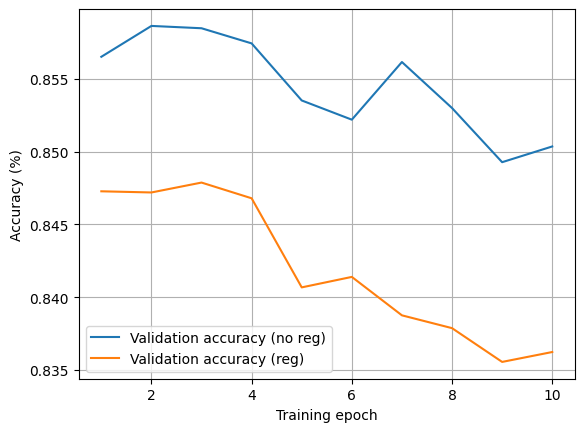

In [7]:
plt.plot(
    range(1, 11),
    history.history['val_acc'],
    label='Validation accuracy (no reg)')
plt.plot(
    range(1, 11),
    history_reg.history['val_acc'],
    label='Validation accuracy (reg)')
plt.legend()
plt.grid()
plt.xlabel('Training epoch')
plt.ylabel('Accuracy (%)')
plt.show()